<a href="https://colab.research.google.com/github/encoras/Artificial-Intelligence-Group/blob/master/Colour_clustering_LAB_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Means clustering on the image L*a*b colours by using Scikit Learn in Python


Adopted from:

https://medium.com/analytics-vidhya/color-separation-in-an-image-using-kmeans-clustering-using-python-f994fa398454

and

https://se7entyse7en.dev/posts/color-quantization-using-k-means/

Colour spaces

https://cran.r-project.org/web/packages/colordistance/vignettes/color-spaces.html


Color Separation in an image is a process of separating colors in the image. This process is done through the KMeans Clustering Algorithm.K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.K-means algorithms identify k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

In [166]:
#load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import plotly as py
import plotly.graph_objs as go
from numpy.random import seed
import cv2
from skimage import color
RAND=2231 # should be your student code abcd
seed(RAND)

In [167]:
# help function for image reconstruction
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

Text(0.5, 1.0, 'Original image ')

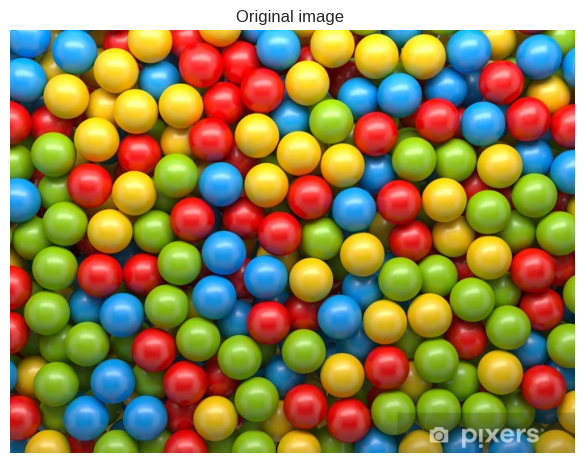

In [168]:
# Load the colour photo with OpenCV
img=cv2.imread("/content/drive/MyDrive/Colab Notebooks/test4.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(1)
plt.clf()
plt.axis("off")
plt.imshow(img)
plt.title("Original image ")

In [169]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])



img = np.array(img, dtype=np.float64) / 255.0

img = color.rgb2lab(img)

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))


In [170]:
# Adopted from: https://stackoverflow.com/questions/31097247/remove-duplicate-rows-of-a-numpy-array
def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a = np.unique(a.view([('', a.dtype)]*a.shape[1]))
    return unique_a.view(a.dtype).reshape((unique_a.shape[0], a.shape[1]))

print('Unique colors in picture', unique_rows(image_array).shape[0])

Unique colors in picture 218467


In [171]:
print("Fitting model on a small sub-sample of the data")

image_array_sample = shuffle(image_array, random_state=RAND, n_samples=10000)

Fitting model on a small sub-sample of the data


Text(0.5, 0.92, 'Original image colours 3D scatter plot')

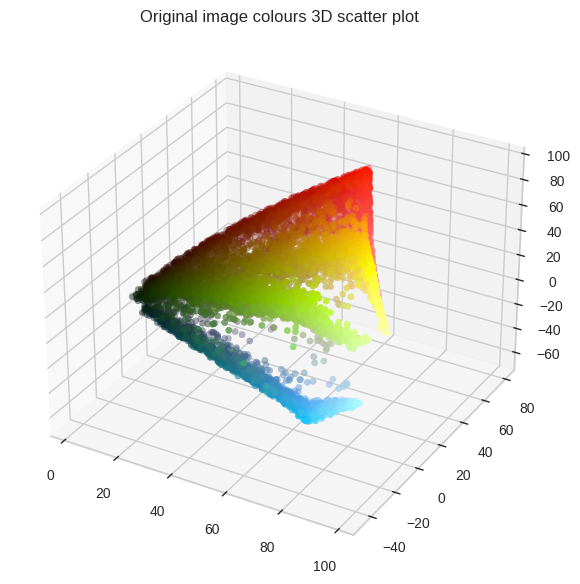

In [172]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(image_array_sample[:,0],image_array_sample[:,1],image_array_sample[:,2], c = color.lab2rgb(image_array_sample))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
plt.title("Original image colours 3D scatter plot")


In [173]:
n_colors = 5

In [174]:
t0 = time()
kmeans = KMeans(n_clusters=n_colors, init="k-means++", random_state=RAND, n_init=10).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")
k_labels=kmeans.labels_
#print(labels)
k_labels=list(k_labels)

done in 0.260s.


In [175]:
centroid=kmeans.cluster_centers_
print(centroid)

[[ 62.9151664  -28.74348681  55.42423155]
 [ 22.16476422   1.92630079  19.76838331]
 [ 55.1282099   -6.41209553 -36.22933064]
 [ 45.98646492  58.42389064  43.1408305 ]
 [ 77.94809778  -0.71646479  69.37553073]]


In [176]:
percent=[]
for i in range(len(centroid)):
  j=k_labels.count(i)
  j=j/(len(k_labels))
  percent.append(j)
print(percent)

[0.2334, 0.1744, 0.18, 0.2277, 0.1845]


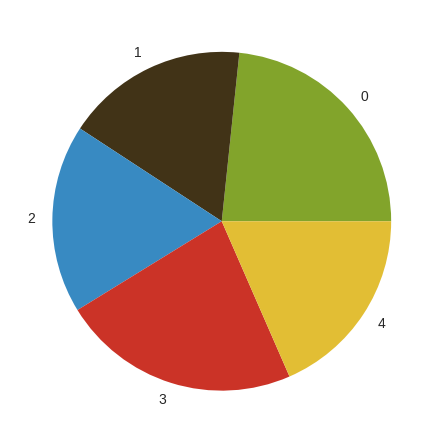

In [177]:
plt.pie(percent,colors=color.lab2rgb(np.array(centroid)),labels=np.arange(len(centroid)))
plt.show()

Text(0.5, 0.92, 'Clustered image colours 3D scatter plot')

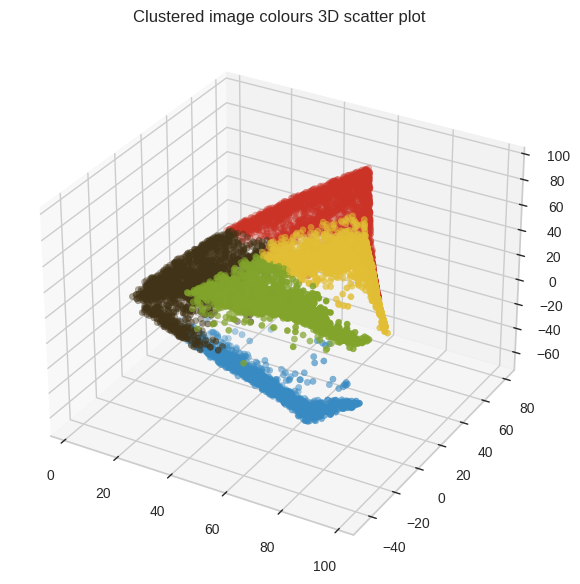

In [178]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(image_array_sample[:,0],image_array_sample[:,1],image_array_sample[:,2],    c = color.lab2rgb(centroid[k_labels,:]))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
plt.title("Clustered image colours 3D scatter plot")


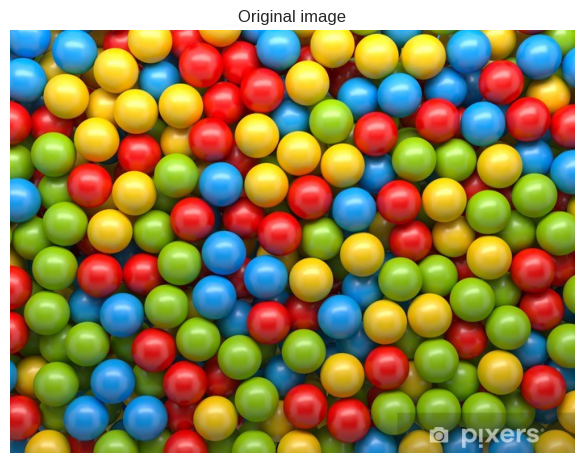

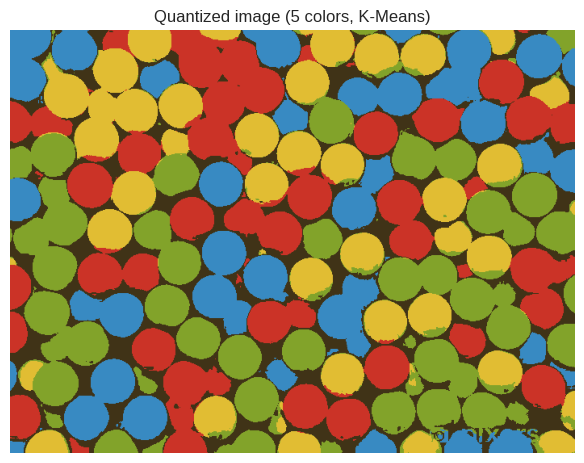

In [179]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(color.lab2rgb(img))

#"Predicting color indices on the full image k-means
labels = kmeans.predict(image_array)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(color.lab2rgb(recreate_image(kmeans.cluster_centers_, labels, w, h)))



# What is the optimal number of colors?

**Elbow Method:-**
The Elbow Method is one of the most popular methods to determine this optimal value of k.

We now define the following:-

Inertia: It is the sum of squared distances of samples to their closest cluster center.

We iterate the values of k from 1 to n and calculate the values of distortions for each value of k and calculate the distortion and inertia for each value of k in the given range.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[29811252.369222157, 18123549.980464466, 8582518.944673331, 5604745.304996223, 4410253.482054764, 3639741.0823437823, 3105925.914270185, 2753982.5797530273, 2458653.831721752, 2215875.7779085455, 2029643.3772511536, 1867407.063050692, 1733818.815087434, 1608628.2504938692, 1501457.2714375053, 1389580.5447229678, 1313360.692777492, 1253252.7822778234, 1193772.0992468575]


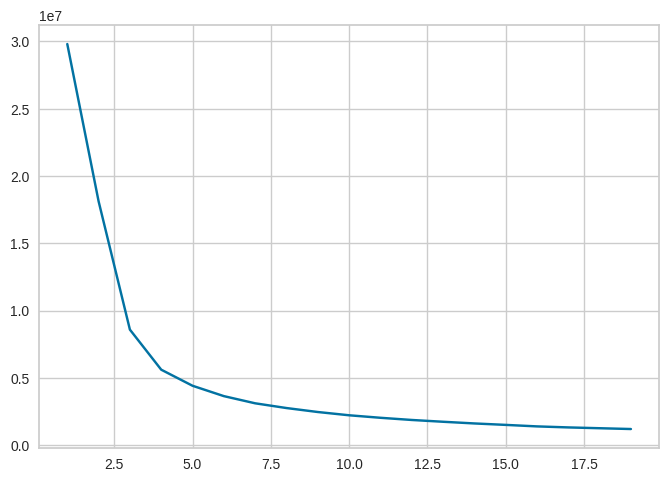

In [180]:
md=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(image_array_sample)
  o=kmeans.inertia_
  md.append(o)
print(md)
plt.plot(list(np.arange(1,20)),md)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

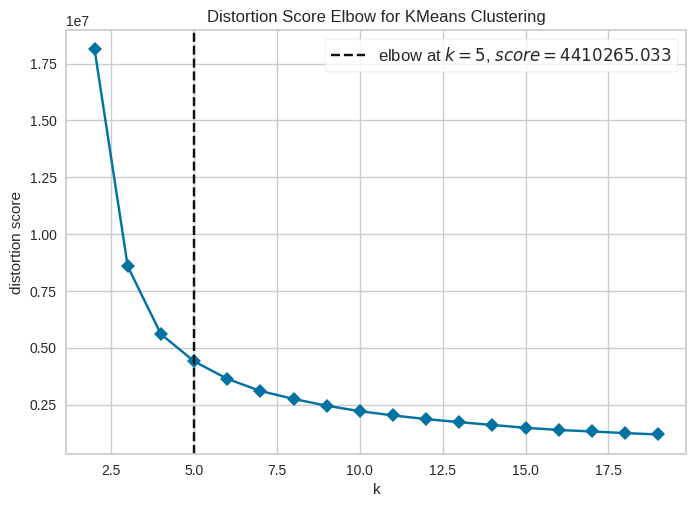

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [181]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(2,20), metric='distortion', timings=False)
#metric='calinski_harabasz'
#metric='silhouette'
#metric='distortion'
visualizer.fit(image_array_sample)        # Fit the data to the visualizer
visualizer.show(timings=False)        # Finalize and render the figure

#Let's play with more colours

In [182]:
n_colors=4
from time import time
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

Fitting model on a small sub-sample of the data
done in 0.030s.
Predicting color indices on the full image (k-means)
done in 0.004s.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [183]:
labels[np.where(labels==0)]=1
labels[np.where(labels==3)]=1

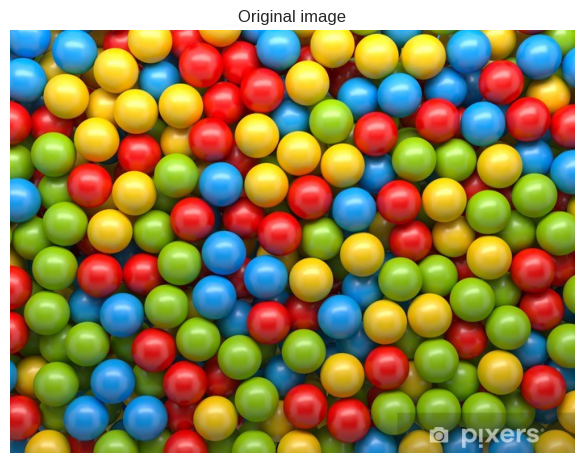

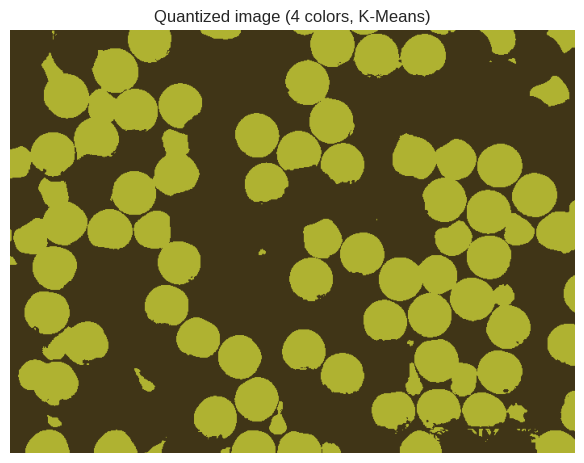

In [184]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image")
plt.imshow(color.lab2rgb(img))

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(color.lab2rgb(recreate_image(kmeans.cluster_centers_, labels, w, h)))



In [193]:

image=255*color.lab2rgb(recreate_image(kmeans.cluster_centers_, labels, w, h))
image.shape

(525, 700, 3)

In [205]:
import cv2
# mask out blackened regions from Train Dotted
mask = cv2.cvtColor(np.uint8(image), cv2.COLOR_BGR2GRAY)

mask[mask < 135] = 0
mask[mask > 0] = 255
#mask=mask.astype(np.uint8)

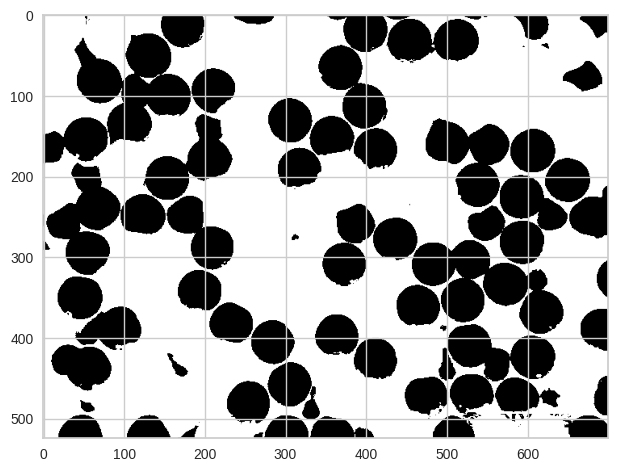

In [206]:
plt.imshow(mask)

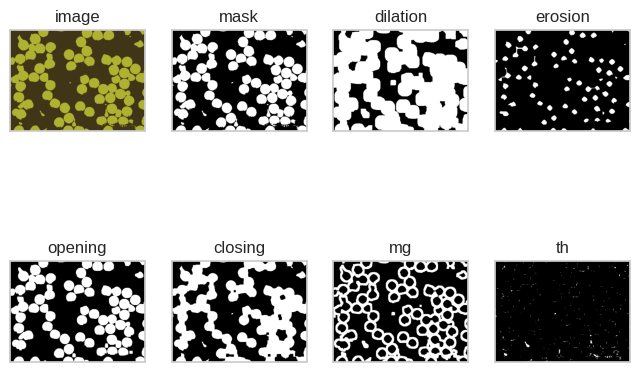

In [221]:
kernal = np.ones((11,11), np.uint8)

dilation = cv2.dilate(mask, kernal, iterations=2)
erosion = cv2.erode(mask, kernal, iterations=2)
opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernal)
closing = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernal)
mg = cv2.morphologyEx(mask, cv2.MORPH_GRADIENT, kernal)
th = cv2.morphologyEx(mask, cv2.MORPH_TOPHAT, kernal)

titles = ['image', 'mask', 'dilation', 'erosion', 'opening', 'closing', 'mg', 'th']
images = [image/255, mask, dilation, erosion, opening, closing, mg, th]

for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

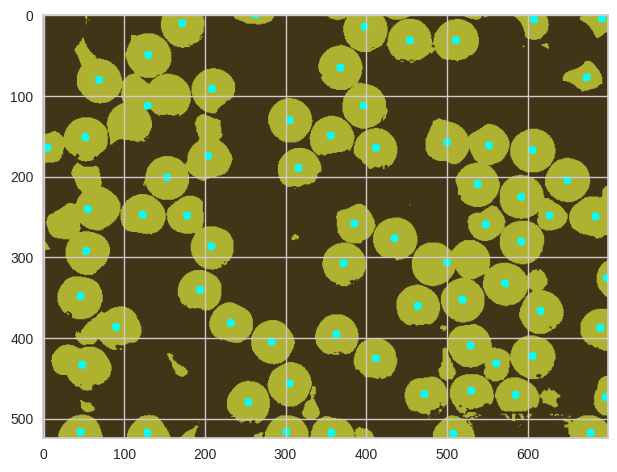

In [222]:
# find contours in the binary image
imgo=image.copy().astype(np.uint8)
thresh_image = erosion.astype(np.uint8).copy()
(contours, _) = cv2.findContours(thresh_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
   # calculate moments for each contour
   M = cv2.moments(c)

   # calculate x,y coordinate of center
   cX = int(M["m10"] / (M["m00"]+1e-10))
   cY = int(M["m01"] / (M["m00"]+1e-10))
   cv2.circle(imgo, (cX, cY), 5, (0, 255, 255), -1)
   #cv2.putText(imgo, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 255), 2)

   # display the image
plt.imshow(imgo)
